In [1]:
import matplotlib.pyplot as plt

In [8]:
import os
import json
import numpy as np


def pure_quebec():
    data = []

    for f_path in filter(lambda x: ".json" in x, os.listdir(os.path.join(os.getcwd(), 'results'))):
        with open(os.path.join(os.getcwd(), 'results', f_path), 'r') as f:

            file = json.loads(f.read())
            if file['backend']['name'] == 'ibm_quebec':
                data.append(file['results']['value'])

    data = np.array(data)
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return data, mean, std


def pure_kolkata():
    data = []

    for f_path in filter(lambda x: x.startswith("Pure") and "ibmq_kolkata" in x, os.listdir(os.path.join(os.getcwd(), 'results'))):
        with open(os.path.join(os.getcwd(), 'results', f_path), 'r') as f:
            data.append(json.loads(f.read()))

    data = np.array(data)
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return data, mean, std


def all():
    data = []

    for f_path in filter(lambda x: x.startswith("Pure"), os.listdir(os.path.join(os.getcwd(), 'results'))):
        with open(os.path.join(os.getcwd(), 'results', f_path), 'r') as f:
            data.append(json.loads(f.read()))

    data = np.array([x[:12] for x in data])
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return data, mean, std


qc = pure_quebec()
kk = pure_kolkata()

all = all()

qc

(array([[0.96745802, 0.89281986, 0.84299145, 0.8183238 , 0.80401105,
         0.81355868, 0.59698141, 0.50278166, 0.51680058, 0.68160496,
         0.37281795, 0.40267793, 0.49855382, 0.23579545, 0.17215402,
         0.13508589, 0.12618707, 0.13549629, 0.17928518, 0.13527089,
         0.21780931, 0.13100758, 0.19212604, 0.0611394 , 0.11511778,
         0.14035401],
        [0.97672448, 0.89054627, 0.84699862, 0.81517469, 0.82005907,
         0.77471833, 0.70168782, 0.49046768, 0.44081962, 0.56773398,
         0.59145646, 0.65976509, 0.59981983, 0.35874328, 0.23249586,
         0.26523991, 0.07326533, 0.10805719, 0.08144211, 0.06134698,
         0.16212308, 0.11063451, 0.05505125, 0.1124081 , 0.13455258,
         0.0910694 ],
        [0.94966466, 0.87172306, 0.8573225 , 0.78967201, 0.75531005,
         0.80543229, 0.57854784, 0.40648667, 0.62684574, 0.55092224,
         0.60226187, 0.13708855, 0.30764934, 0.22925191, 0.26589738,
         0.14203593, 0.15287108, 0.1951971 , 0.14526643, 0.

1.0023756910856008


/Users/jbwaring/Downloads/pink2-concordia-dac/.venv/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


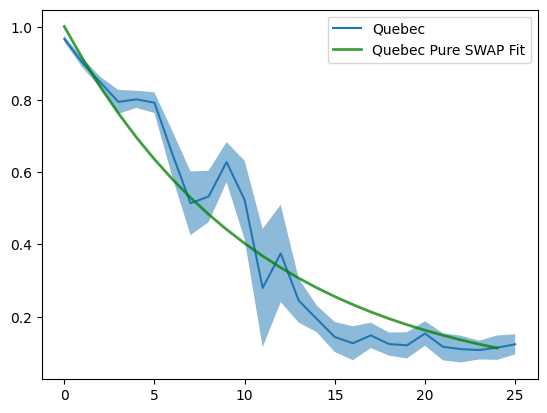

In [17]:
from scipy.optimize import curve_fit
import pandas as pd


def exponential(x, a, b, c):
    return 1 * np.exp(-b * x) + c


initial_guess = [1.0, 0.1, 0.0]

popt_qc, pcov_qc = curve_fit(
    exponential, range(len(qc[1])), qc[1], p0=initial_guess)

initial_guess = [-.8, 0.5, 0.25]

print(exponential(0, *popt_qc))
# popt_kk, pcov_kk = curve_fit(
# exponential, range(len(kk[1][2:])), kk[1][2:], )
# qc1 = pd.Series(qc[1])
# qc2 = pd.Series(qc[2])


# for iter in range(1):
#     avg = []
#     for i in range(1, len(qc[1])):
#         diff_with_fit = exponential(i, *popt_qc) - qc[1][i]
#         if (diff_with_fit > 0.05):
#             avg.append(exponential(i, *popt_qc))
#         else:
#             avg.append(qc[1][i])
#     popt_qc, pcov_qc = curve_fit(
#         exponential, range(1, len(avg)+1), avg, p0=initial_guess)
# avg.append(qc[1][i]/ (1-3*(diff**2)))
plt.plot(qc[1], label="Quebec")
# plt.plot(kk[1], label="Kolktata")
# plt.plot(all[1], label="All")
# plt.plot([0, len(data)], [mean, mean], 'r--')

# plt.plot(range(1, len(avg)+1), avg, label="Quebec Rolling Average")
# plt.fill_between(range(len(qc[1])), qc1-qc2, qc1+qc2, alpha=0.5)
plt.fill_between(range(len(qc[1])), qc[1]-qc[2], qc[1]+qc[2], alpha=0.5)
# plt.fill_between(range(len(kk[1])), kk[1]-kk[2], kk[1]+kk[2], alpha=0.5)
# plt.plot(range(0, 25), exponential(range(0, 25), *popt_qc),
#  'g-', linewidth=2, label='Quebec Pure SWAP Fit', alpha=0.75, zorder=2)
# plt.plot(range(0, 25)[2:], exponential(range(0, 25)[2:], *popt_kk),
#  'g-', linewidth=2, label='Kokalta Pure SWAP Fit', alpha=0.75, zorder=2)
# plt.fill_between(range(len(all[1])), all[1]-all[2], all[1]+all[2], alpha=0.5)
plt.legend()
plt.show()

0     0.897339
1     0.826212
2     0.691333
3     0.188379
4     0.485544
5     0.408796
6     0.664058
7     0.475333
8     0.508766
9     0.402522
10    0.169767
11    0.383509
12    0.218869
13    0.259891
14    0.140428
15    0.141654
16    0.052996
17    0.143841
18    0.098631
19    0.067324
20    0.073346
21    0.082371
22    0.085504
23    0.086981
24    0.075153
25    0.086015
dtype: float64

In [5]:
len(qc[1]), len(kk[1])

(26, 12)

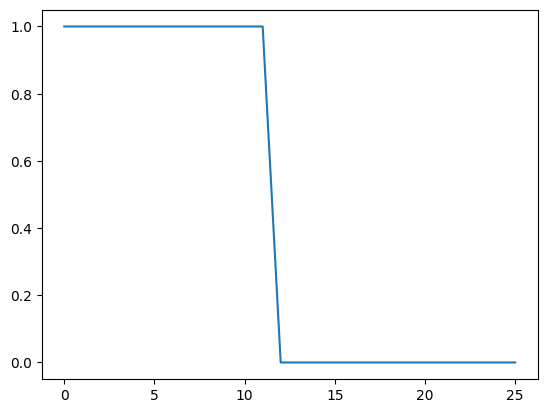

In [6]:
dat = [0.9724271972205099, 0.9108288985949071, 0.8415986491602808, 0.7972093096269279, 0.7815976006326932, 0.7718432692901078, 0.6155223634912739, 0.45932718067732503, 0.3574020687081678, 0.5950558740072429, 0.7556514603980087, 0.6280935491858681, 0.1070118004719407,
       0.21271176452685375, 0.16569885655681998, 0.08766145540841548, 0.15001844240487194, 0.11654979594747719, 0.08056402737979786, 0.13487056257750393, 0.11988083187186113, 0.11096729039454262, 0.1375894960974492, 0.13786236341347385, 0.07227158745740783, 0.11982635596691071]
dat2 = [0.9724271972205099, 0.9108288985949071, 0.8415986491602808, 0.7972093096269279, 0.7815976006326932, 0.7718432692901078, 0.6155223634912739, 0.45932718067732503, 0.3574020687081678, 0.5950558740072429, 0.7556514603980087, 0.6280935491858681, 0.1070118004719407,
        0.21271176452685375, 0.16569885655681998, 0.08766145540841548, 0.15001844240487194, 0.11654979594747719, 0.08056402737979786, 0.13487056257750393, 0.11988083187186113, 0.11096729039454262, 0.1375894960974492, 0.13786236341347385, 0.07227158745740783, 0.11982635596691071]

plt.plot([x > 0.25 for x in dat])
plt.show()